In [2]:
import numpy as np

# Plot the function

In [3]:
#define surface to minimize
b = 20
q = 1/10
w = 10

#function to be minimized
def f(x, y):
    return b*(1-np.exp( - (1/2) * w * (x**2 + y**2))) + (q/2) * ( - x**3 + y)**2

#derivative w.r.t x
def fx(x, y):
    return b * np.exp(-1/2 * w * (x**2 + y**2)) * w * x - 3 * q * x**2 *(-x**3 + y)

#derivative w.r.t y
def fy(x, y):
    return b * np.exp(-1/2 * w * (x**2 + y**2)) * w * y + q *(-x**3 + y)

#gradient
def grad_f(param):
    x = param[0]
    y = param[1]
    return [fx(x,y), fy(x,y)]
    

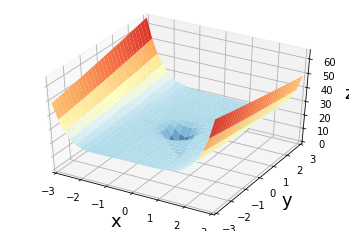

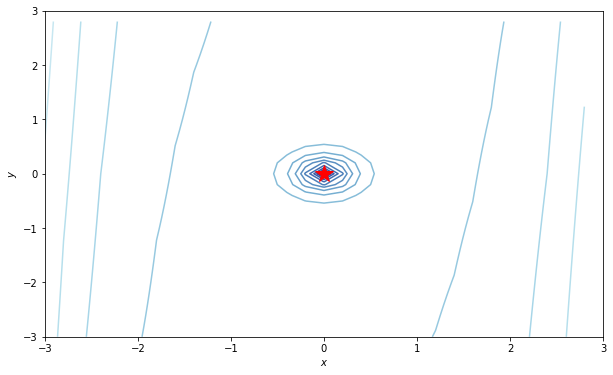

In [4]:
#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest


#Define function for plotting 

def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': 0, 'vmax': 65}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(0, 65)
    
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax;

def contour_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f(x,y)
    cax = ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(0,0, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-3, 3))
    ax.set_ylim((-3, 3))
    
    return fig,ax

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

x, y = np.mgrid[-3:3:31j, -3:3:31j]
fig1,ax1=plot_surface(x,y,f(x,y))
fig4,ax4 =contour_function()
plt.show()



# Try different algorithms

In [5]:
#Gradient descent and gradient descent+momentum

def gd(grad, init, n_epochs=5000, eta=10**-4, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def gd_with_mom(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

In [6]:
#NAG algorithm

def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

In [7]:
def rms_prop(grad, init, n_epochs=5000, eta=10**-3, beta=0.9,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init#Import relevant packages
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj

In [8]:
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

# Plot minimization with different algorithms 

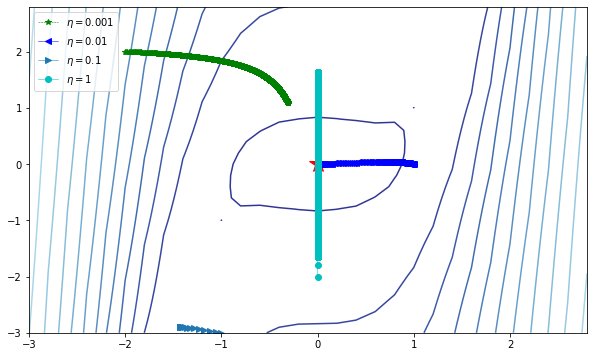

In [9]:
# Investigate effect of learning rate in GD
plt.close()
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.001
eta2=0.01
eta3=0.1
eta4=1
gd_1=gd(grad_f,init1, eta=eta1)
gd_2=gd(grad_f,init2, eta=eta2)
gd_3=gd(grad_f,init3, eta=eta3)
gd_4=gd(grad_f,init4, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
#fig.savefig("GD3regimes.pdf", bbox_inches='tight')

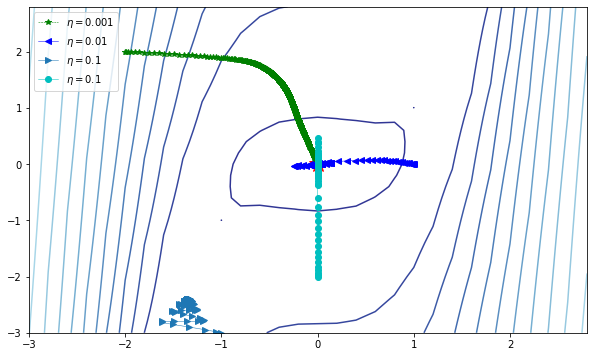

In [11]:
# Investigate effect of learning rate in GD with mom
plt.close()
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.001
eta2=0.01
eta3=0.1
eta4=0.1
gd_1=gd_with_mom(grad_f,init1, eta=eta1)
gd_2=gd_with_mom(grad_f,init2, eta=eta2)
gd_3=gd_with_mom(grad_f,init3, eta=eta3)
gd_4=gd_with_mom(grad_f,init4, eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
#fig.savefig("GD3regimes.pdf", bbox_inches='tight')

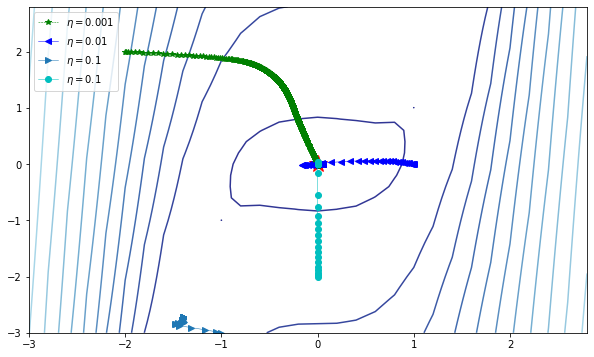

In [16]:
# Investigate effect of learning rate in NAG
plt.close()
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.001
eta2=0.01
eta3=0.1
eta4=0.1
gd_1=NAG(grad_f,init1,eta=eta1)
gd_2=NAG(grad_f,init2,eta=eta2)
gd_3=NAG(grad_f,init3,eta=eta3)
gd_4=NAG(grad_f,init4,eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
#fig.savefig("GD3regimes.pdf", bbox_inches='tight')

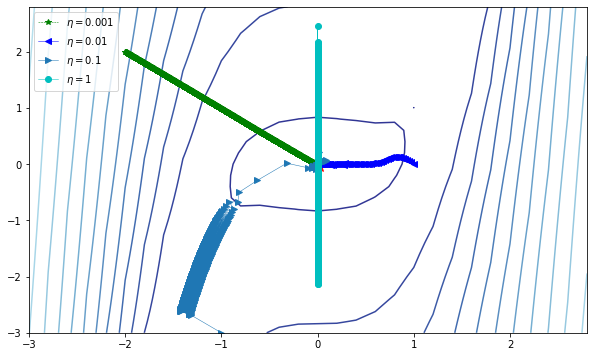

In [17]:
# Investigate effect of learning rate in RMS
plt.close()
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.001
eta2=0.01
eta3=0.1
eta4=1
gd_1=rms_prop(grad_f,init1,eta=eta1)
gd_2=rms_prop(grad_f,init2,eta=eta2)
gd_3=rms_prop(grad_f,init3,eta=eta3)
gd_4=rms_prop(grad_f,init4,eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
#fig.savefig("GD3regimes.pdf", bbox_inches='tight')

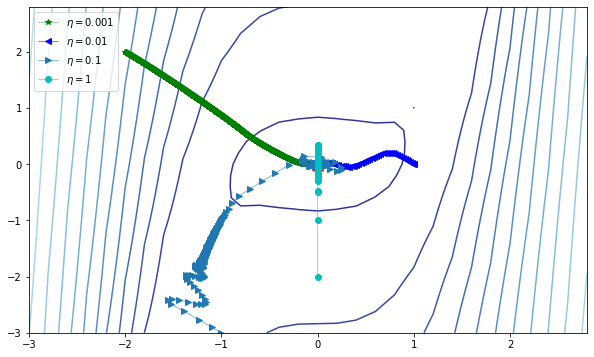

In [19]:
# Investigate effect of learning rate in Adams
plt.close()
a,b = 1.0,1.0
x, y = np.meshgrid(np.arange(-3, 3, 0.2), np.arange(-3, 3, 0.2))
fig, ax = plt.subplots(figsize=(10, 6))
z=f(x,y)
ax.contour(x, y, z, levels=np.logspace(0.0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
ax.plot(0,0, 'r*', markersize=18)

#initial point
init1=[-2,2]
init2=[1,0]
init3=[-1,-3]
init4=[0,-2]
eta1=0.001
eta2=0.01
eta3=0.1
eta4=1
gd_1=adams(grad_f,init1,eta=eta1)
gd_2=adams(grad_f,init2,eta=eta2)
gd_3=adams(grad_f,init3,eta=eta3)
gd_4=adams(grad_f,init4,eta=eta4)
#print(gd_1)
overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()
#fig.savefig("GD3regimes.pdf", bbox_inches='tight')

## Computing and plotting mean of function values

In [20]:
#GD
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])

trajectories=[]
for point in starting_points:
    trajectories.append(gd(grad_f,point,noise_strength=0.1))

trajectories=np.asarray(trajectories)
    
mean_gd=np.zeros(5001)
for j in range(5001):
        mean_gd[j]=(f(trajectories[:,j,0],trajectories[:,j,1]).sum())/starting_points.shape[0]




In [21]:
#GD with mom
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])

trajectories=[]
for point in starting_points:
    trajectories.append(gd_with_mom(grad_f,point,))

trajectories=np.asarray(trajectories)
    
mean_gdwithmom=np.zeros(5001)
for j in range(5001):
        mean_gdwithmom[j]=(f(trajectories[:,j,0],trajectories[:,j,1]).sum())/starting_points.shape[0]





In [22]:
#NAG
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])

trajectories=[]
for point in starting_points:
    trajectories.append(NAG(grad_f,point))

trajectories=np.asarray(trajectories)
    
mean=np.zeros(5001)
for j in range(5001):
        mean[j]=(f(trajectories[:,j,0],trajectories[:,j,1]).sum())/starting_points.shape[0]




In [23]:
#RMS
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])

trajectories=[]
for point in starting_points:
    trajectories.append(rms_prop(grad_f,point))

trajectories=np.asarray(trajectories)
    
mean_rms=np.zeros(5001)
for j in range(5001):
        mean_rms[j]=(f(trajectories[:,j,0],trajectories[:,j,1]).sum())/starting_points.shape[0]





In [24]:
#Adams
x, y = np.meshgrid(np.arange(-3, 3, 1), np.arange(-3, 3, 1))
starting_points = np.array([[i,j] for i,j in zip(np.concatenate(x),np.concatenate(y))])

trajectories=[]
for point in starting_points:
    trajectories.append(adams(grad_f,point))

trajectories=np.asarray(trajectories)
    
mean_adams=np.zeros(5001)
for j in range(5001):
        mean_adams[j]=(f(trajectories[:,j,0],trajectories[:,j,1]).sum())/starting_points.shape[0]





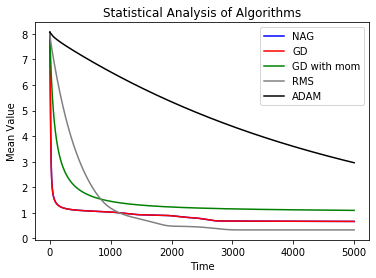

In [26]:
#plotting
from matplotlib import pyplot as plt

plt.figure(1)

t=np.arange(0,5001,1)
plt.plot(t,mean,label="NAG",color='blue')
plt.plot(t,mean_gdwithmom,label="GD",color='red')
plt.plot(t,mean_gd,label="GD with mom",color='green')
plt.plot(t,mean_rms,label="RMS",color='grey')
plt.plot(t,mean_adams,label="ADAM",color='black')
plt.ylabel("Mean Value")
plt.xlabel("Time")
plt.title("Statistical Analysis of Algorithms")
plt.legend()
plt.show()